## Analyzing Entropy for a Random Circuit
Considering circuits different number of Qubits and varying Depths

**1) Configure Qiskit Runtime Service, and Input Parameters**
<br/>
Input Parameters:
- Range for number of qubits
- Circuit depth range
- Number of circuit runs

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
from config import api_key
import numpy as np

# # Save an IBM Quantum account as your default account, and Load saved credentials
# QiskitRuntimeService.save_account(
#     channel="ibm_quantum", token=api_key, set_as_default=True, overwrite=True
# )
# service = QiskitRuntimeService()

# Define Input Parameters
num_q = np.arange(2, 6, 1)
depths = np.arange(3, 21, 1)
runs = 20

**2) Generate Random Circuits and Compute Entropy**

In [2]:
from qiskit.providers.basic_provider import BasicSimulator
import pandas as pd
from random_circuit import eagle_gate_set, basis_gate_set
from random_circuit import get_random_circuit
from entropy import get_average_entropy
from utils import get_measurement

# Define backend to run jobs
backend = BasicSimulator()
# backend = service.backend("ibmq_qasm_simulator")

# Choose a set of gates to build circuit
gate_set = basis_gate_set

# Calculate entropy - Looping over depth and number of qubits
data_list = []
for n in num_q:
    for d in depths:
        circuit = get_random_circuit(n, d, gate_set)
        measurement = get_measurement(circuit, runs, backend)
        entropy = get_average_entropy(measurement)
        data_list.append(
            {
                "Num": n,
                "depth": d,
                "entropy": entropy,
                "circuit": circuit,
                "measurement": measurement,
            }
        )
data = pd.DataFrame(data_list)

# Print the DataFrame
print(data)

    Num  depth   entropy                                            circuit  \
0     2      3  0.119856  ((Instruction(name='swap', num_qubits=2, num_c...   
1     2      4  0.144855  ((Instruction(name='id', num_qubits=1, num_clb...   
2     2      5  0.139876  ((Instruction(name='x', num_qubits=1, num_clbi...   
3     2      6  0.144898  ((Instruction(name='z', num_qubits=1, num_clbi...   
4     2      7  0.134856  ((Instruction(name='swap', num_qubits=2, num_c...   
..  ...    ...       ...                                                ...   
67    5     16  0.334135  ((Instruction(name='id', num_qubits=1, num_clb...   
68    5     17  0.339131  ((Instruction(name='x', num_qubits=1, num_clbi...   
69    5     18  0.354097  ((Instruction(name='y', num_qubits=1, num_clbi...   
70    5     19  0.373900  ((Instruction(name='swap', num_qubits=2, num_c...   
71    5     20  0.329244  ((Instruction(name='swap', num_qubits=2, num_c...   

                                          measureme

**3) Plot Entropy vs Depth for different Number of Qubits**

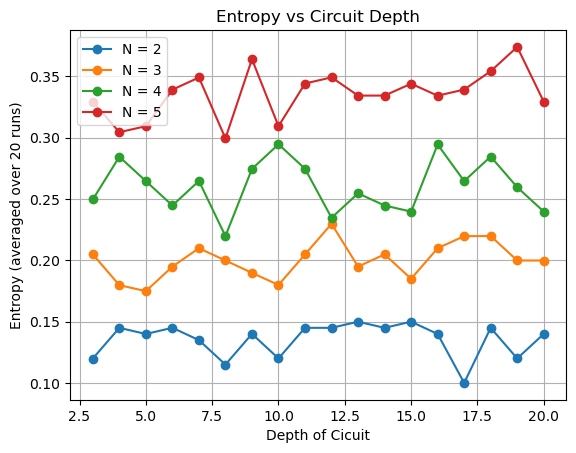

In [3]:
import matplotlib.pyplot as plt

# Plotting
plt.title("Entropy vs Circuit Depth")
plt.xlabel("Depth of Cicuit")
plt.ylabel("Entropy (averaged over " + str(runs) + " runs)")

for N in num_q:
    filtered_df = data[data["Num"] == N]
    lbl = "N = " + str(N)
    plt.plot(filtered_df["depth"], filtered_df["entropy"], marker="o", label=lbl)

plt.grid(True)
plt.legend()
plt.show()

**4) Find circuit with Lowest and Highest Entropy for given Depth**

In [5]:
from entropy import get_extreme_entropy_data

# Printing circuit with highest and lowest entropy
depth = 11
highest, lowest = get_extreme_entropy_data(data, depth)
print("Circuit with the highest entropy for depth ", depth, ":")
print(highest["circuit"])
print("Circuit with the lowest entropy for depth ", depth, ":")
print(lowest["circuit"])

Circuit with the highest entropy for depth  11 :
     ┌───┐     ┌───┐        ┌───┐┌───┐┌───┐               ┌───┐┌───┐          »
q_0: ┤ X ├─────┤ X ├──■───X─┤ Y ├┤ X ├┤ X ├───────────────┤ X ├┤ Z ├──────────»
     └─┬─┘┌───┐└─┬─┘┌─┴─┐ │ ├───┤└───┘└───┘┌───┐     ┌───┐└─┬─┘└───┘     ┌───┐»
q_1: ──┼──┤ Y ├──■──┤ X ├─┼─┤ X ├───────■──┤ X ├─────┤ X ├──┼────X────X──┤ I ├»
       │  ├───┤  │  ├───┤ │ ├───┤┌───┐  │  └─┬─┘┌───┐└─┬─┘  │    │    │  └───┘»
q_2: ──■──┤ I ├──┼──┤ I ├─┼─┤ Z ├┤ X ├──┼────■──┤ Z ├──┼────┼────X────X───────»
          ├───┤  │  └───┘ │ ├───┤├───┤  │    │  ├───┤  │    │  ┌───┐     ┌───┐»
q_3: ──■──┤ Y ├──┼────X───┼─┤ Z ├┤ X ├──┼────┼──┤ I ├──■────■──┤ Y ├──■──┤ I ├»
     ┌─┴─┐└───┘  │    │   │ └───┘└───┘┌─┴─┐  │  ├───┤       │  ├───┤┌─┴─┐├───┤»
q_4: ┤ X ├───────■────X───X───────────┤ X ├──■──┤ Y ├───────■──┤ I ├┤ X ├┤ Y ├»
     └───┘                            └───┘     └───┘          └───┘└───┘└───┘»
«     ┌───┐     
«q_0: ┤ X ├──X──
«     └─┬─┘  │  
«q_1: ──┼────X──
«  

**5) Lowest and Highest Entropy circuit analysis - Measurement Histogram and Bloch Sphere**

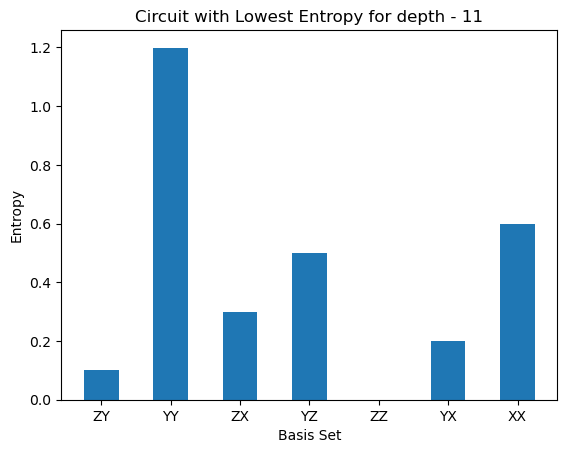

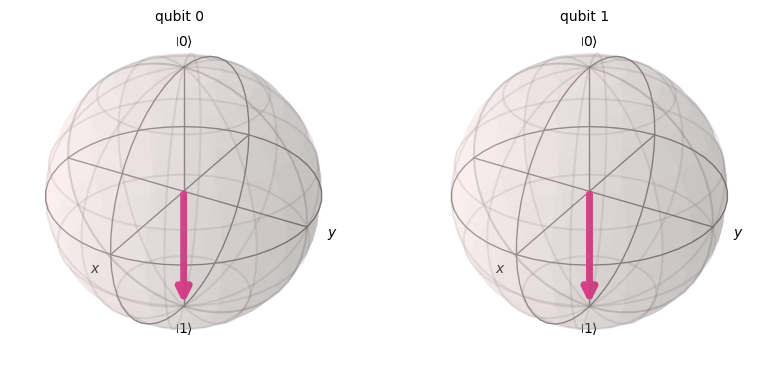

In [11]:
import matplotlib.pyplot as plt
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_bloch_multivector
from entropy import get_entropy_list

# Lowest Entropy Circuit - Measurement Histogram and Bloch Sphere
low_entropy = get_entropy_list(lowest["measurement"])
basis = list(low_entropy.keys())
entropy_low = list(low_entropy.values())
plt.title("Circuit with Lowest Entropy for depth - " + str(depth))
plt.xlabel("Basis Set")
plt.ylabel("Entropy")
plt.bar(basis, entropy_low, width=0.5)
plt.show()

density_matrix = DensityMatrix.from_instruction(lowest["circuit"])
plot_bloch_multivector(density_matrix)

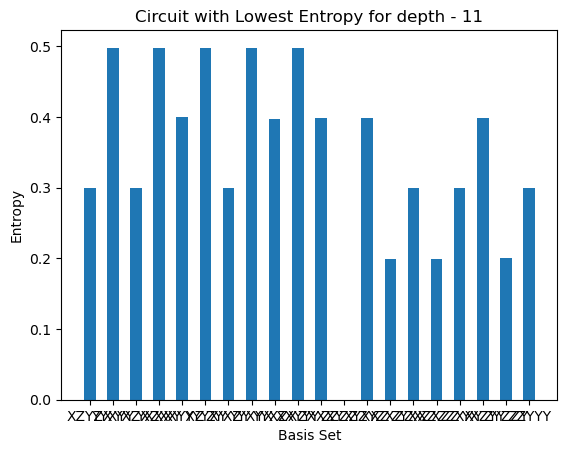

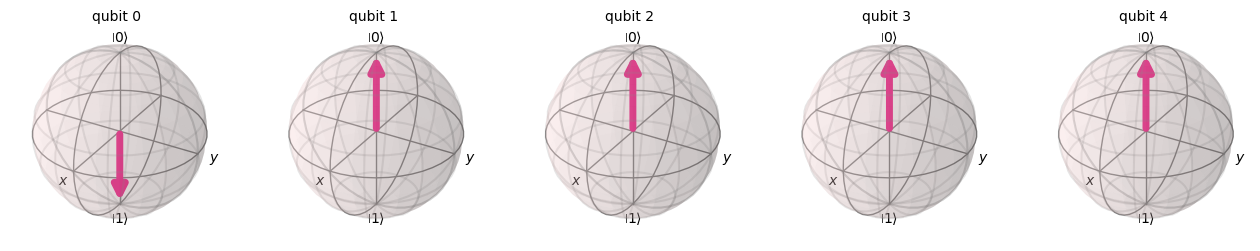

In [13]:
# Highest Entropy Circuit - Measurement Histogram and Bloch Sphere
high_entropy = get_entropy_list(highest["measurement"])
basis = list(high_entropy.keys())
entropy_high = list(high_entropy.values())
plt.title("Circuit with Lowest Entropy for depth - " + str(depth))
plt.xlabel("Basis Set")
plt.ylabel("Entropy")
plt.bar(basis, entropy_high, width=0.5)
plt.show()

density_matrix = DensityMatrix.from_instruction(highest["circuit"])
plot_bloch_multivector(density_matrix)